# Telecom Domain Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os, sys

In [4]:
# Importing the data
customer_churn = pd.read_csv('Telcom Data.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Information

In [6]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
 customer_churn.shape

(7043, 21)

## Data Preprocessing and EDA

In [10]:
# Checking for null values
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No, null values in the dataset. Thus, no treatment of null values.

In [12]:
# Checking for duplicated values
customer_churn.duplicated().sum()

0

No, duplicated values in the dataset. 

In [14]:
# Convertong TotalCharges from 'object' and 'float'
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(' ', np.nan)

In [15]:
customer_churn['TotalCharges'].isnull().sum()

11

In [16]:
customer_churn['TotalCharges'].mode()

0    20.2
Name: TotalCharges, dtype: object

In [17]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].fillna('20.2')

In [18]:
customer_churn['TotalCharges'].isnull().sum()

0

In [19]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [20]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### EDA

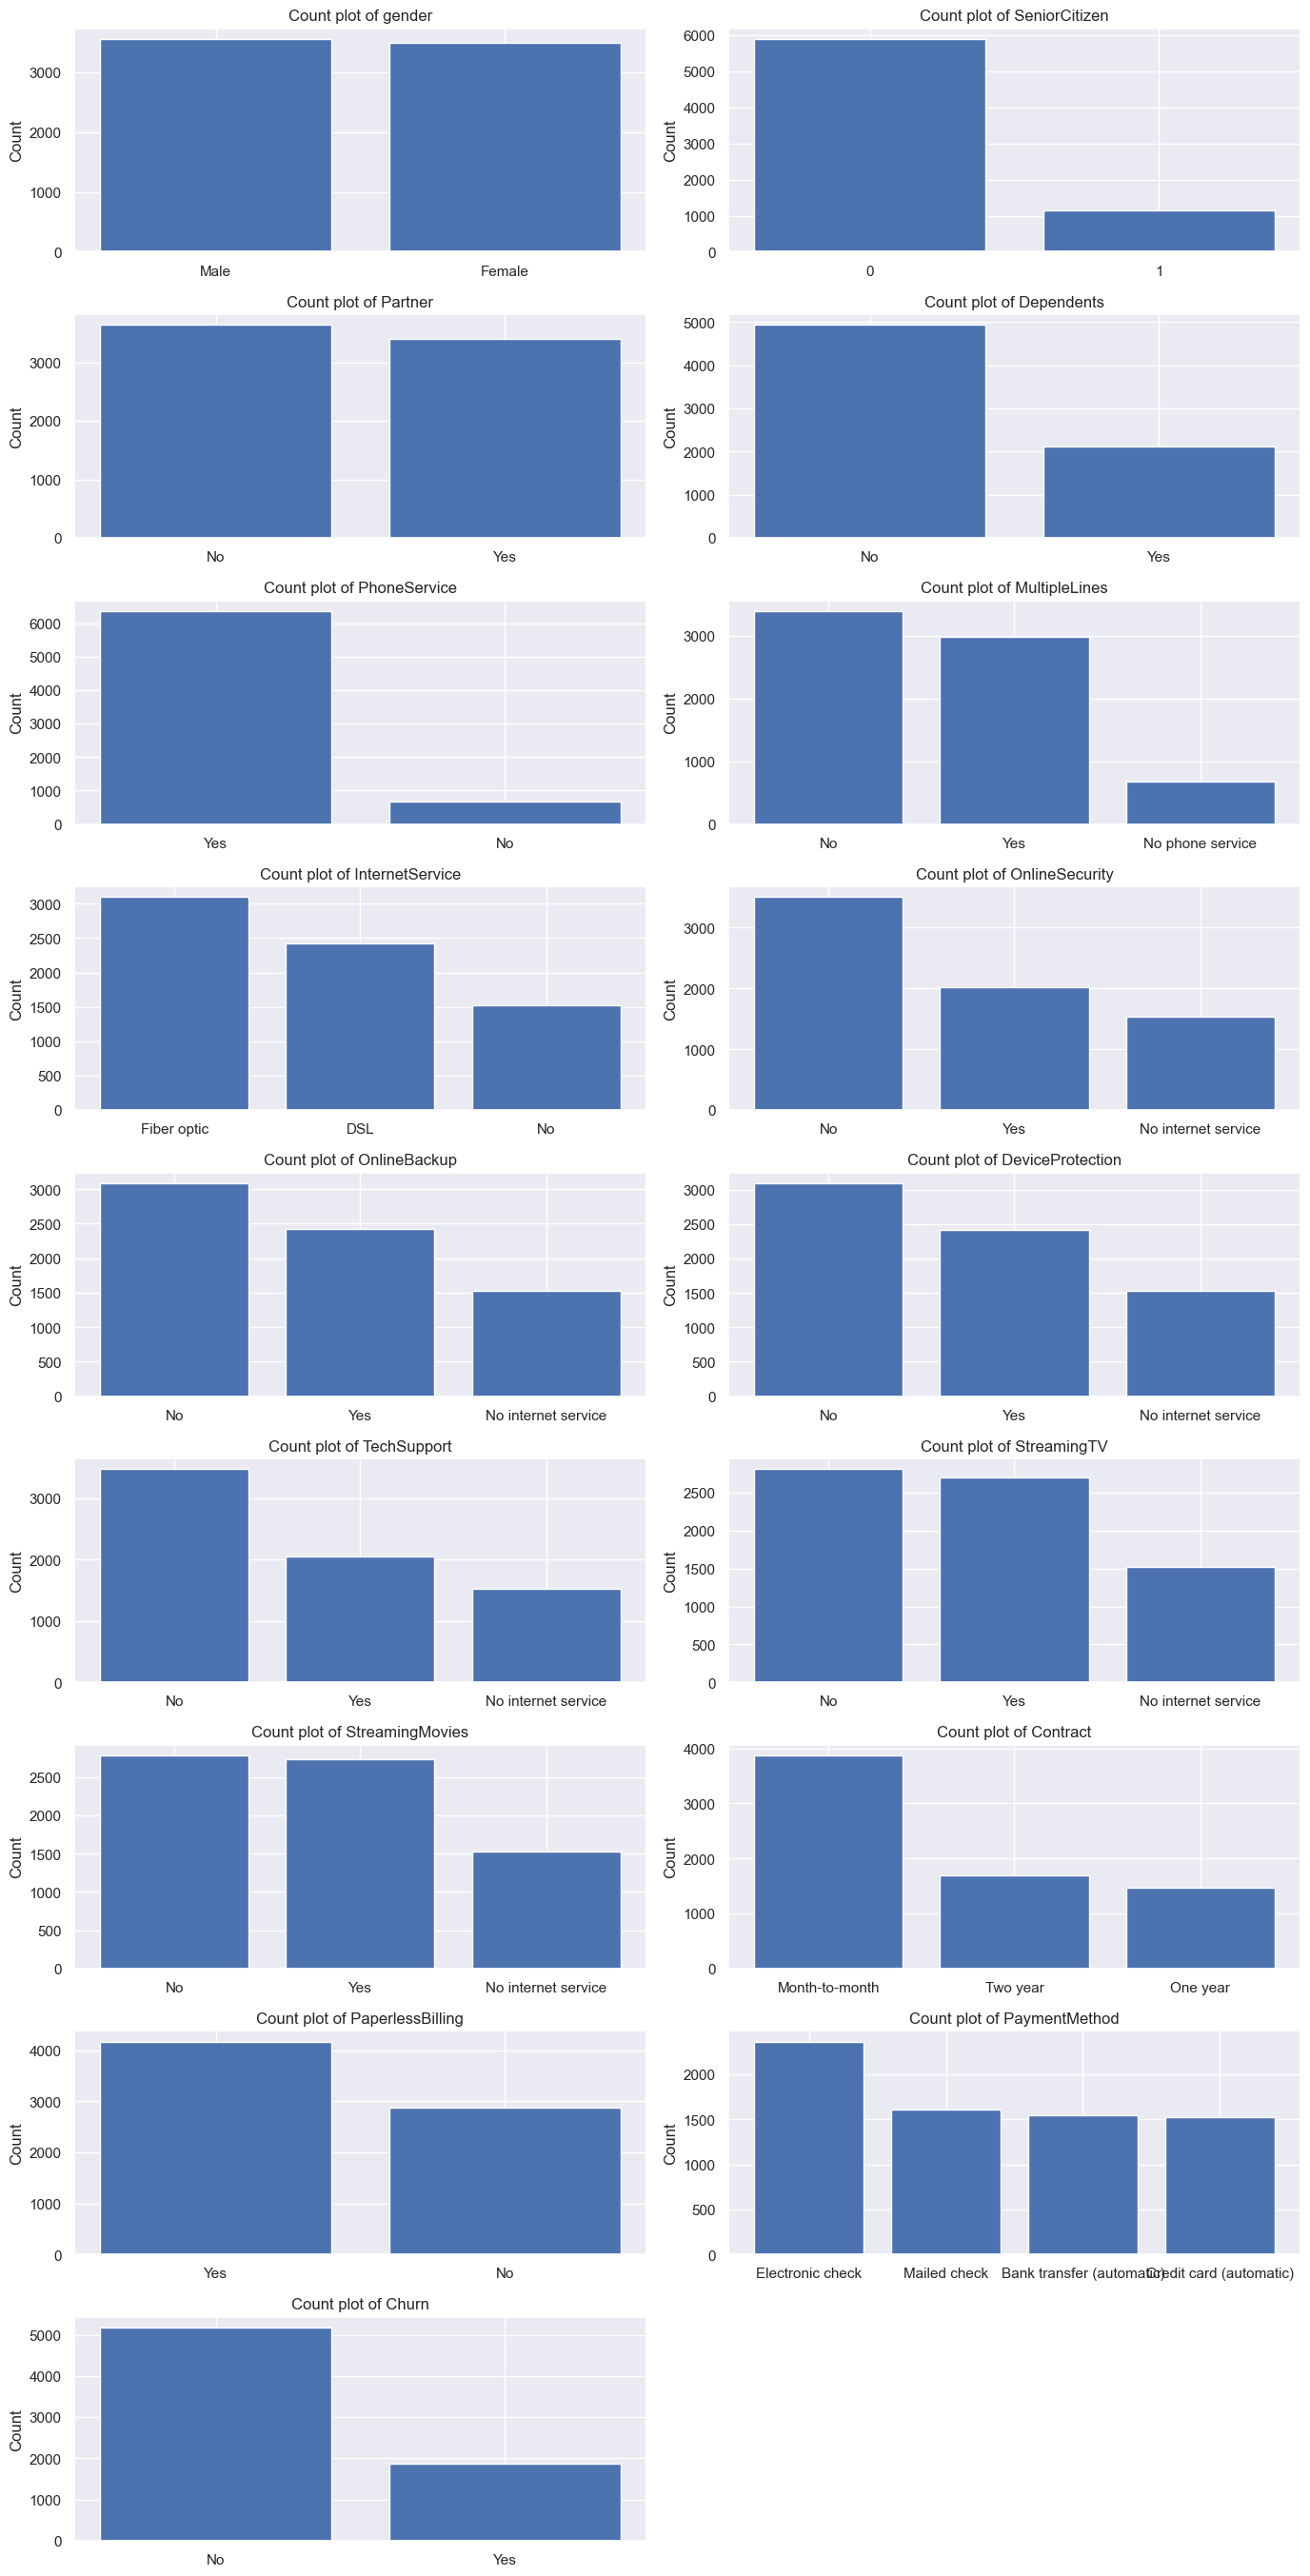

In [22]:
# Using barplot to evaluate columns with their count
cat_columns = customer_churn.select_dtypes(include=['object']).columns.tolist()
cat_columns.insert(2, 'SeniorCitizen')
cat_columns.remove('customerID')
plt.figure(figsize=(14, len(cat_columns) * 3))

for index, feature in enumerate(cat_columns):
    col_data = customer_churn[feature].value_counts()
    plt.subplot(len(cat_columns), 2, index+1)
    plt.bar(col_data.index, col_data)
    plt.title(f"Count plot of {feature}")
    plt.ylabel('Count')
    plt.xticks(col_data.index)

plt.tight_layout()
plt.show()

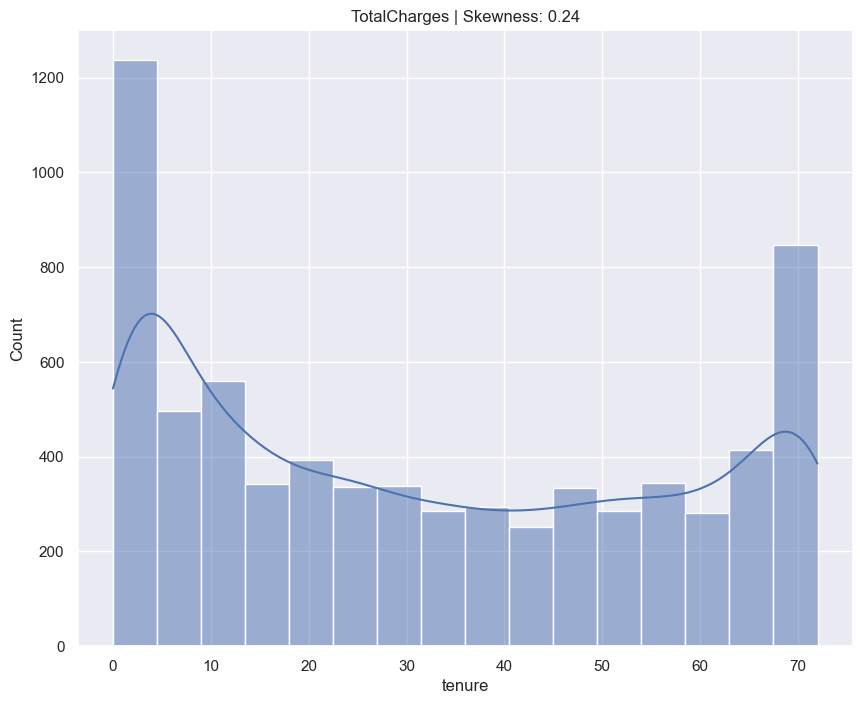

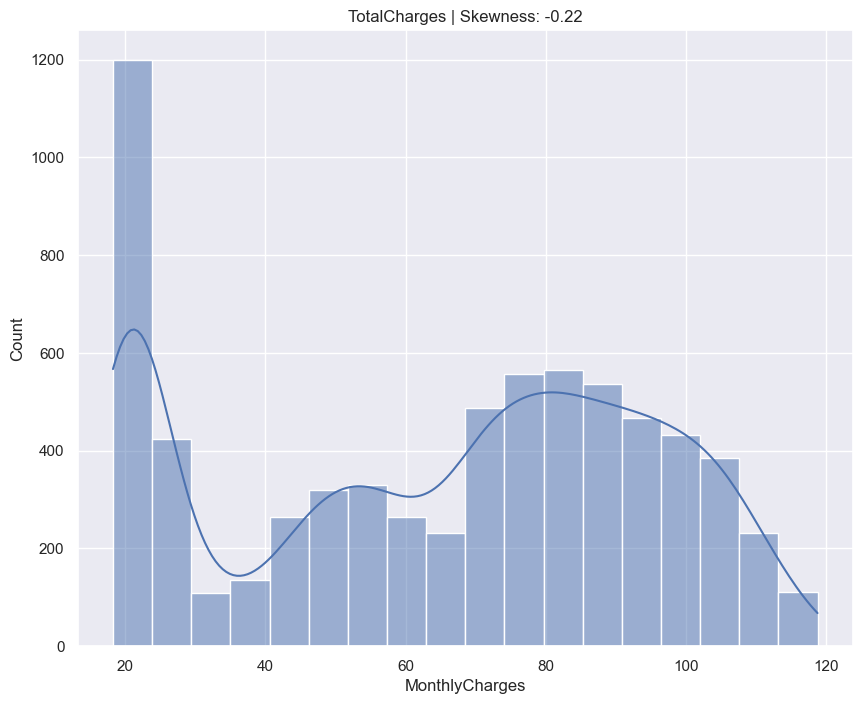

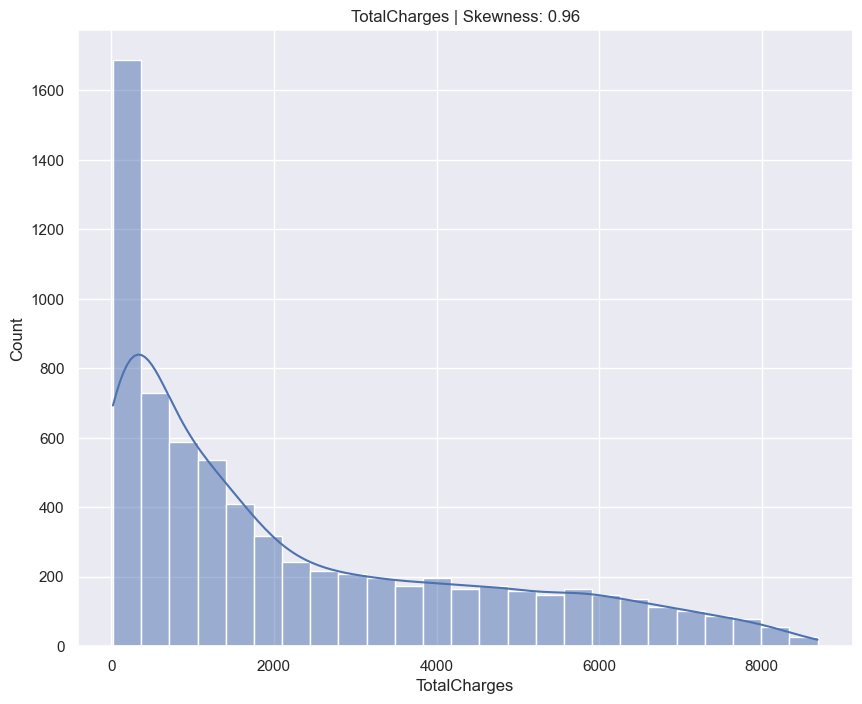

In [23]:
num_columns = customer_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns.remove('SeniorCitizen')

for feature in num_columns:
    plt.figure(figsize=(10, 8))
    sns.histplot(customer_churn[feature], kde=True)
    plt.title(f"TotalCharges | Skewness: {round(customer_churn[feature].skew(), 2)}")
    plt.show()
    print()

### Now Encoding the dataset using One-hot-Encoder

In [25]:
# Changing Churn column into 0 and 1
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes':1, 'No':0})

In [26]:
# Checking the columns anddtypes
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
# Converting the columns into bool
customer_churn = pd.get_dummies(customer_churn, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [28]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [29]:
# Changing the gender_Male column from bool to int
customer_churn['gender_Male'] = np.where(customer_churn['gender_Male']==True, 1, 0)

In [30]:
customer_churn.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,0,1,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,1,1,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,0,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,1,0,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [31]:
dataset = customer_churn.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [32]:
dataset.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [33]:
dataset1 = dataset.drop(['customerID'], axis=1)

In [34]:
dataset1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Train Test split

In [36]:
# Splitting the data into x and y
x = dataset1.drop(['Churn'], axis=1)
y = dataset1['Churn']

In [37]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [39]:
y.value_counts(normalize = True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

The data is imbalanced, thus imbalance treatment is required.

In [41]:
# Treating imbalanced data using SMOTE method
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print('Before applying SMOTE:')
print(y.value_counts())
print('\nAfter applying SMOTE:')
print(y_smote.value_counts())

Before applying SMOTE:
Churn
0    5174
1    1869
Name: count, dtype: int64

After applying SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64


  File "C:\Users\Twarit\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Twarit\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Twarit\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Twarit\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [42]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=26)

In [43]:
# Pandas profiling 
from ydata_profiling import ProfileReport
report = ProfileReport(dataset)
report.to_file(output_file="Telecom_data_ProfileReport.html")

ModuleNotFoundError: No module named 'ydata_profiling'

## Feature Scaling - using Standard Scaler

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
x_train[scaler_cols] = scaler.fit_transform(x_train[scaler_cols])
x_test[scaler_cols] = scaler.fit_transform(x_test[scaler_cols])

In [54]:
x_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
10344,0,-0.823824,0.414514,-0.633297,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3209,0,-1.115417,0.912655,-0.894144,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
5291,0,1.675548,0.655391,1.711067,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
846,0,1.550579,0.599767,1.571480,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,0,0
3289,0,0.550830,0.726660,0.737795,0,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [56]:
x_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9103,0,-0.961020,-1.293728,-0.856943,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3070,0,-0.877902,-0.589486,-0.779616,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2557,0,-1.002579,-0.780615,-0.854707,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9119,0,-1.085696,-0.788055,-0.898369,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7505,1,0.077951,0.401218,0.111867,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Building Models

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [60]:
# Prediction
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [62]:
# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score

In [64]:
# Classification Report
print('-' * 20, 'Training Data', '-' * 20)
print(classification_report(y_train, y_pred_train))
print()
print('-' * 21, 'Test Data', '-' * 21)
print(classification_report(y_test, y_pred_test))

-------------------- Training Data --------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3657
           1       0.82      0.85      0.83      3586

    accuracy                           0.83      7243
   macro avg       0.83      0.83      0.83      7243
weighted avg       0.83      0.83      0.83      7243


--------------------- Test Data ---------------------
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1517
           1       0.83      0.85      0.84      1588

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [66]:
# Accuracy Score
print('Training Data accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Data accuracy:', accuracy_score(y_test, y_pred_test))

Training Data accuracy: 0.8322518293524782
Test Data accuracy: 0.8344605475040258


In [68]:
print('Model Accuracy:', round(accuracy_score(y_test, y_pred_test) * 100, 4))

Model Accuracy: 83.4461


### Decision Tree Classifier

In [324]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=56)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=56, splitter='random')

In [326]:
# Prediction
y_pred_train_dtree = dtree.predict(x_train)
y_pred_test_dtree = dtree.predict(x_test)

In [328]:
# Classification Report
print('-' * 20, 'Training Data', '-' * 20)
print(classification_report(y_train, y_pred_train_dtree))
print()
print('-' * 21, 'Test Data', '-' * 21)
print(classification_report(y_test, y_pred_test_dtree))

-------------------- Training Data --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3657
           1       1.00      1.00      1.00      3586

    accuracy                           1.00      7243
   macro avg       1.00      1.00      1.00      7243
weighted avg       1.00      1.00      1.00      7243


--------------------- Test Data ---------------------
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1517
           1       0.78      0.75      0.76      1588

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



In [330]:
# Accuracy Score
print('Training Data accuracy:', accuracy_score(y_train, y_pred_train_dtree))
print('Test Data accuracy:', accuracy_score(y_test, y_pred_test_dtree))

Training Data accuracy: 0.998619356620185
Test Data accuracy: 0.7626409017713366


In [216]:
print('Model Accuracy:', round(accuracy_score(y_test, y_pred_test_dtree) * 100, 4))

Model Accuracy: 76.2641


### Random Forest Classifier

In [332]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=47)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=47)

In [334]:
# Prediction
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

In [336]:
# Classification Report
print('-' * 20, 'Training Data', '-' * 20)
print(classification_report(y_train, y_pred_train_rfc))
print()
print('-' * 21, 'Test Data', '-' * 21)
print(classification_report(y_test, y_pred_test_rfc))

-------------------- Training Data --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3657
           1       1.00      1.00      1.00      3586

    accuracy                           1.00      7243
   macro avg       1.00      1.00      1.00      7243
weighted avg       1.00      1.00      1.00      7243


--------------------- Test Data ---------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1517
           1       0.84      0.81      0.83      1588

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [338]:
# Accuracy Score
print('Training Data accuracy:', accuracy_score(y_train, y_pred_train_rfc))
print('Test Data accuracy:', accuracy_score(y_test, y_pred_test_rfc))

Training Data accuracy: 0.998619356620185
Test Data accuracy: 0.8257648953301128


In [340]:
print('Model Accuracy:', round(accuracy_score(y_test, y_pred_test_rfc) * 100, 4))

Model Accuracy: 82.5765


### Support Vector Classifier

In [515]:
from sklearn.svm import SVC
svc = SVC(C=1.03, random_state=18)
svc.fit(x_train, y_train)

SVC(C=1.03, random_state=18)

In [517]:
# Prediction
y_pred_train_svc = svc.predict(x_train)
y_pred_test_svc = svc.predict(x_test)

In [519]:
# Classification Report
print('-' * 20, 'Training Data', '-' * 20)
print(classification_report(y_train, y_pred_train_svc))
print()
print('-' * 21, 'Test Data', '-' * 21)
print(classification_report(y_test, y_pred_test_svc))

-------------------- Training Data --------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3657
           1       0.85      0.86      0.85      3586

    accuracy                           0.85      7243
   macro avg       0.85      0.85      0.85      7243
weighted avg       0.85      0.85      0.85      7243


--------------------- Test Data ---------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1517
           1       0.84      0.84      0.84      1588

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [521]:
print('Model Accuracy:', round(accuracy_score(y_test, y_pred_test_svc) * 100, 4))

Model Accuracy: 83.5427


### Linear SVC

In [650]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.64, random_state=35)
lsvc.fit(x_train, y_train)

LinearSVC(C=0.64, random_state=35)

In [652]:
# Prediction
y_pred_train_lsvc = lsvc.predict(x_train)
y_pred_test_lsvc = lsvc.predict(x_test)

In [654]:
# Classification Report
print('-' * 20, 'Training Data', '-' * 20)
print(classification_report(y_train, y_pred_train_lsvc))
print()
print('-' * 21, 'Test Data', '-' * 21)
print(classification_report(y_test, y_pred_test_lsvc))

-------------------- Training Data --------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3657
           1       0.82      0.84      0.83      3586

    accuracy                           0.83      7243
   macro avg       0.83      0.83      0.83      7243
weighted avg       0.83      0.83      0.83      7243


--------------------- Test Data ---------------------
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1517
           1       0.83      0.86      0.84      1588

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [656]:
print('Model Accuracy:', round(accuracy_score(y_test, y_pred_test_lsvc) * 100, 4))

Model Accuracy: 83.5749


### AdaBoost Classifier

In [709]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=rfc, n_estimators=100, random_state=25)
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=200,
                                                    random_state=47),
                   n_estimators=100, random_state=25)

In [711]:
# Prediction
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)

In [713]:
# Classification Report
print('-' * 20, 'Training Data', '-' * 20)
print(classification_report(y_train, y_pred_train_ada))
print()
print('-' * 21, 'Test Data', '-' * 21)
print(classification_report(y_test, y_pred_test_ada))

-------------------- Training Data --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3657
           1       1.00      1.00      1.00      3586

    accuracy                           1.00      7243
   macro avg       1.00      1.00      1.00      7243
weighted avg       1.00      1.00      1.00      7243


--------------------- Test Data ---------------------
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1517
           1       0.84      0.82      0.83      1588

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [715]:
print('Model Accuracy:', round(accuracy_score(y_test, y_pred_test_ada) * 100, 4))

Model Accuracy: 83.124
